# Predicting Microsoft Stock High Price (Linear Regression)

### Utilize SciKit-Learn, SciPy, Matplotlib, Pandas

In [1]:
import pandas as pd

stock = pd.read_csv('/Users/faris/Downloads/MicroSoft.csv',header=None)
stock.rename(columns={0:'Date', 
                      1:'Open',
                      2:'High',
                      3:'Low',
                      4:'Close',
                      5:'Adj Close',
                      6:'Volume'},inplace=True)
stock = stock.drop([0])
stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric)
stock

,Date,Open,High,Low,Close,Adj Close,Volume
1,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
2,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
3,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
4,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
5,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...,...
9119,2022-05-16,259.959991,265.820007,255.779999,261.500000,260.892365,32550900
9120,2022-05-17,266.109985,268.329987,262.459991,266.820007,266.200012,28828800
9121,2022-05-18,263.000000,263.600006,252.770004,254.080002,254.080002,31356000
9122,2022-05-19,253.899994,257.670013,251.880005,253.139999,253.139999,32692300


(-0.5, 9122.5, 0.0, 1.05)

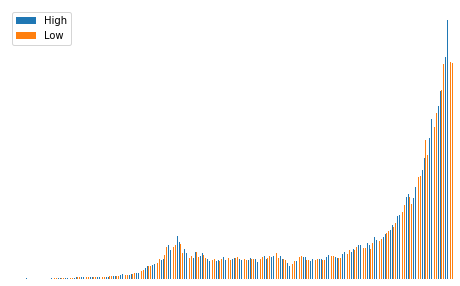

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

stock_normalized = stock[['Date', 'High', 'Low']].copy()

stock_normalized[['High','Low']] = scaler.fit_transform(stock_normalized[['High','Low']])

stock_normalized.plot(y=['High','Low'], kind='bar', figsize=(8,5)).axis('off')

In [3]:
stock_normalized['High'].corr(stock_normalized['Low'])

0.9998897340835834

Slope: 1.0207539532327952
y-intercept: 0.04503090916850283
f(x) = 1.0207539532327952x + 0.04503090916850283


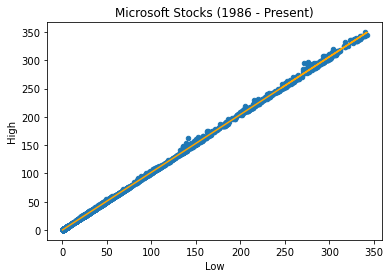

In [4]:
from scipy import stats
from matplotlib import pyplot as plt

stock_regression = stock[['High', 'Low']].copy()

slope, intercept, r, p, se = stats.linregress(stock_regression['Low'], stock_regression['High'])
print('Slope: ' + str(slope))
print('y-intercept: ' + str(intercept))
print('f(x) = ' + str(slope) + 'x + ' + str(intercept))

stock_regression['fx'] = (slope * stock_regression['Low']) + intercept
stock_regression['error'] = stock_regression['fx'] - stock_regression['High']
stock_regression.plot.scatter(x='Low', y='High')

plt.plot(stock_regression['Low'],stock_regression['fx'], color='Orange')

plt.title('Microsoft Stocks (1986 - Present)')

plt.show()

In [5]:
stock_regression[['High','Low','fx','error']]

,High,Low,fx,error
1,0.101563,0.088542,0.135411,0.033848
2,0.102431,0.097222,0.144271,0.041840
3,0.103299,0.100694,0.147815,0.044516
4,0.103299,0.098958,0.146043,0.042744
5,0.100694,0.097222,0.144271,0.043577
...,...,...,...,...
9119,265.820007,255.779999,261.133476,-4.686531
9120,268.329987,262.459991,267.952104,-0.377883
9121,263.600006,252.770004,258.061012,-5.538994
9122,257.670013,251.880005,257.152542,-0.517471


In [6]:
def f(x):
    slopes = slope
    intercepts = intercept
    return slopes*float(x) + intercepts

stock_low = input('What is the low stock price:' )

prediction = f(stock_low)

print('Prediction for High Stock Value: ' + str(prediction))

What is the low stock price:632
Prediction for High Stock Value: 645.161529352295
